In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.api as sm

In [3]:
"""
模型介紹
GARCH模型稱為廣義ARCH模型，是ARCH模型的擴展，由Bollerslev(1986)發展出來的。它是ARCH模型的推廣。GARCH(p,0)模型，相當於ARCH(p)模型。

參考網頁：
1) https://zhuanlan.zhihu.com/p/348107698
2) https://blog.nex3z.com/2019/07/24/time-series-q-statistic/
3) https://blog.csdn.net/duxu24/article/details/52079901
"""

'\n模型介紹\nGARCH模型稱為廣義ARCH模型，是ARCH模型的擴展，由Bollerslev(1986)發展出來的。它是ARCH模型的推廣。GARCH(p,0)模型，相當於ARCH(p)模型。\n\n參考網頁：\n1) https://zhuanlan.zhihu.com/p/348107698\n2) https://blog.nex3z.com/2019/07/24/time-series-q-statistic/\n3) https://blog.csdn.net/duxu24/article/details/52079901\n'

In [4]:
import pandas as pd
import requests
import io

# 將json改為csv

url = 'https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=20220412&type=ALLBUT0999&_=1649743235999'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/111.25 (KHTML, like Gecko) Chrome/99.0.2345.81 Safari/123.36'}

res = requests.get(url,headers=headers)

# 去除指數價格
lines = [l for l in res.text.split('\n') if len(l.split(',"'))>=10]
# 將list轉為txt方便用csv讀取
df = pd.read_csv(io.StringIO(','.join(lines)))
# 將不必要的符號去除
df = df.applymap(lambda s:(str(s).replace('=','').replace(',','').replace('"',''))).set_index('證券代號')
# 將數字轉為數值型態
df = df.applymap(lambda s:pd.to_numeric(str(s),errors='coerce')).dropna(how='all',axis=1)
df

,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
證券代號,,,,,,,,,,,,,
0050,15367279,25468,2032841606,132.15,132.85,131.60,132.55,0.10,132.55,7,132.60,44,0.00
0051,41710,98,2444469,58.50,58.85,58.35,58.40,0.20,58.40,38,58.55,35,0.00
0052,974237,1369,116419243,119.00,120.30,118.25,119.55,0.10,119.50,1,119.55,106,0.00
0053,8219,13,513984,62.70,62.70,62.00,62.50,0.25,62.05,1,62.65,12,0.00
0054,4085,7,121359,29.70,29.71,29.69,29.71,0.20,29.44,8,29.67,5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,109928,109,2310097,21.10,21.15,20.65,21.00,0.10,20.80,1,21.05,2,4.35
9945,17344629,13016,1290439757,76.00,77.00,73.00,73.20,4.60,73.20,100,73.30,18,9.46
9946,39461,55,524147,13.15,13.35,13.15,13.35,0.00,13.20,30,13.35,1,19.63


In [5]:
pip install twstock

Note: you may need to restart the kernel to use updated packages.


In [6]:
import twstock
import pandas as pd
# 導入twstock及pandas模組，pandas模組縮寫為pd

target_stock = '0050'  #股票代號變數
stock = twstock.Stock(target_stock)  #告訴twstock我們要查詢的股票
target_price = stock.fetch_from(2020, 5)  #取用2020/05至今每天的交易資料

name_attribute = [ 'Date','Capacity', 'Turnover', 'Open', 'High', 'Low', 'Close', 'Change',
    'Transcation'
]  #幫收集到的資料設定表頭

df = pd.DataFrame(columns=name_attribute, data=target_price)
#將twstock抓到的清單轉成Data Frame格式的資料表

#filename = f'./data/{target_stock}.csv'
#指定Data Frame轉存csv檔案的檔名與路徑

#df.to_csv(filename)
#將Data Frame轉存為csv檔案

In [7]:
df

,Date,Capacity,Turnover,Open,High,Low,Close,Change,Transcation
0,2020-05-04,15648380,1296408090,82.4,83.30,82.20,83.00,-2.50,8848
1,2020-05-05,7810636,651512279,83.5,83.80,83.00,83.40,0.40,3986
2,2020-05-06,6142593,511218824,83.3,83.75,82.60,83.50,0.10,3610
3,2020-05-07,6140995,514715030,83.5,84.15,83.30,83.85,0.35,3429
4,2020-05-08,6034013,508981564,84.6,84.75,84.00,84.35,0.50,3530
...,...,...,...,...,...,...,...,...,...
837,2023-10-04,12322148,1500309693,122.1,122.20,121.35,121.90,-1.60,23810
838,2023-10-05,4410768,543373343,122.4,123.65,122.40,123.65,1.75,8646
839,2023-10-06,5059285,627964218,123.8,124.30,123.80,124.10,0.45,6632
840,2023-10-11,14193410,1790523768,125.9,126.40,125.85,126.25,2.15,15854


In [8]:
from datetime import datetime #datetime套件

df.Date = pd.to_datetime(df.Date)
df['Date'].head()

0   2020-05-04
1   2020-05-05
2   2020-05-06
3   2020-05-07
4   2020-05-08
Name: Date, dtype: datetime64[ns]

In [9]:
df = df.set_index("Date")
df.head()

,Capacity,Turnover,Open,High,Low,Close,Change,Transcation
Date,,,,,,,,
2020-05-04,15648380,1296408090,82.4,83.30,82.2,83.00,-2.50,8848
2020-05-05,7810636,651512279,83.5,83.80,83.0,83.40,0.40,3986
2020-05-06,6142593,511218824,83.3,83.75,82.6,83.50,0.10,3610
2020-05-07,6140995,514715030,83.5,84.15,83.3,83.85,0.35,3429
2020-05-08,6034013,508981564,84.6,84.75,84.0,84.35,0.50,3530


In [10]:
from datetime import datetime #导入datetime模块
df.index=pd.to_datetime(df.index) #转换数据格式
ts=df['Open']
ts

Date
2020-05-04     82.4
2020-05-05     83.5
2020-05-06     83.3
2020-05-07     83.5
2020-05-08     84.6
              ...  
2023-10-04    122.1
2023-10-05    122.4
2023-10-06    123.8
2023-10-11    125.9
2023-10-12    126.5
Name: Open, Length: 842, dtype: float64

In [11]:
import statsmodels.api as sm

Text(0.5, 1.0, '0050開盤價')

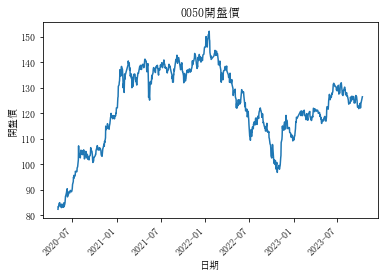

In [12]:
plt.rcParams['font.sans-serif']=['SimSun']
plt.rcParams['axes.unicode_minus']=False #时序圖繪製
ts.plot()
plt.xticks(rotation=45)
plt.xlabel('日期') #横、縱坐標以及標題命名
plt.ylabel('開盤價')
plt.title('0050開盤價',loc='center')

In [13]:
from statsmodels.tsa.stattools import adfuller #ADF单位根检验
result = adfuller(ts) #不能拒绝原假设，即原序列存在单位根
print(result)

(-2.6187946949846532, 0.08917466858010903, 0, 841, {'1%': -3.4381494909387555, '5%': -2.864982795593248, '10%': -2.568603222439172}, 2853.14484148544)


In [14]:
ts1= ts.diff().dropna() #一阶差分再进行ADF检验
result = adfuller(ts1)
print(result)

(-28.913093415055215, 0.0, 0, 840, {'1%': -3.4381588046529123, '5%': -2.8649869014550267, '10%': -2.5686054095804987}, 2857.4025509930975)


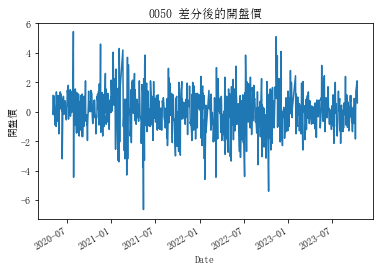

In [15]:
plt.rcParams['font.sans-serif']=['SimSun']
plt.rcParams['axes.unicode_minus']=False
plt.xticks(rotation=45) #坐标角度旋转
plt.xlabel('日期') #横、纵坐标以及标题命名
plt.ylabel('開盤價')
plt.title('0050 差分後的開盤價',loc='center')
ts1.plot()
plt.show() #一阶差分后的时序图

In [16]:
from statsmodels.tsa import stattools #白噪声检验:Ljung-Box检验
LjungBox=stattools.q_stat(stattools.acf(ts1)[1:12],len(ts1))[1] #显示第一个到第11个白噪声检验的p值
LjungBox  #检验的p值大于0.05，因此不能拒绝原假设，差分后序列白噪声检验通过

C:\Users\11065004\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\11065004\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([0.96598041, 0.5163158 , 0.67190659, 0.77984421, 0.82881826,
       0.90066329, 0.80127612, 0.87100255, 0.91607138, 0.85215522,
       0.89098196])

In [17]:
# import warnings

# warnings.filterwarnings("ignore")

In [18]:
#模型識別與定價

In [19]:
from statsmodels.tsa.arima.model import ARIMA #导入ARIMA模型
model = ARIMA(ts,order=(1,1,0)) #白噪声检验通过，直接确定模型
result = model.fit()
result.summary() #提取模型信息

C:\Users\11065004\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\11065004\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\11065004\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                  842
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1458.075
Date:                Thu, 12 Oct 2023   AIC                           2920.150
Time:                        18:47:12   BIC                           2929.619
Sample:                             0   HQIC                          2923.779
                                - 842                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0029      0.027      0.108      0.914      -0.050       0.055
sigma2         1.8768      0.066     28.249      0.000       1.747       2.007
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               133.01
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
"""
在进行时间序列分析时，通常会先使用 Ljung-Box Q 统计量检查时间序列是否存在自相关。如果存在自相关，就可以考虑使用模型对序列进行拟合。我们希望模型的残差是白噪声，此时可以对拟合的残差再使用 Ljung-Box Q 统计量进行一次检验，如果残差不存在自相关，说明模型能够很好地捕获序列中的相关关系。
"""

'\n在进行时间序列分析时，通常会先使用 Ljung-Box Q 统计量检查时间序列是否存在自相关。如果存在自相关，就可以考虑使用模型对序列进行拟合。我们希望模型的残差是白噪声，此时可以对拟合的残差再使用 Ljung-Box Q 统计量进行一次检验，如果残差不存在自相关，说明模型能够很好地捕获序列中的相关关系。\n'

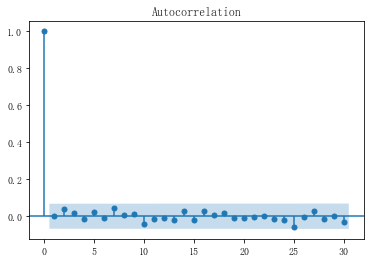

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #导入自相关和偏自相关包
plot_acf(ts1,use_vlines=True,lags=30) #自相关函数图，滞后30阶
plt.show()

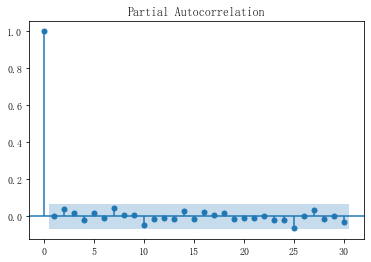

In [22]:
plot_pacf(ts1,use_vlines=True,lags=30) #偏自相关函数图
plt.show()

In [23]:
train_results = sm.tsa.arma_order_select_ic(ts1, ic=['aic', 'bic'], trend='nc', max_ar=8, max_ma=8)
print('AIC', train_results.aic_min_order) #建立AIC值最小的模型
# print('BIC', train_results.bic_min_order)

C:\Users\11065004\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\11065004\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(

AIC (4, 2)


C:\Users\11065004\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\11065004\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
model = ARIMA(ts,order=(2,1,2)).fit()
model.summary() #提取模型系数等信息，保留三位小数；summary2保留四位小数

C:\Users\11065004\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\11065004\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\11065004\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\11065004\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                  842
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1455.756
Date:                Thu, 12 Oct 2023   AIC                           2921.511
Time:                        18:54:31   BIC                           2945.184
Sample:                             0   HQIC                          2930.584
                                - 842                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6617      0.014     47.374      0.000       0.634       0.689
ar.L2         -0.9816      0.014    -68.328      0.000      -1.010      -0.953
ma.L1         -0.6574      0.010    -65.832      0.000      -0.677      -0.638
ma.L2          0.9933      0.013     79.404      0.000       0.969       1.018
sigma2         1.8414      0.066     27.936      0.000       1.712       1.971
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               121.45
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
#print(model.summary().tables[1])

In [26]:
model.conf_int() #系数显著性检验

,0,1
ar.L1,0.634301,0.689051
ar.L2,-1.009772,-0.953457
ma.L1,-0.677013,-0.637866
ma.L2,0.968797,1.017834
sigma2,1.712244,1.970628


In [27]:
sigma2 = model.conf_int().loc["sigma2"]

In [28]:
model.resid.iloc[1:]

Date
2020-05-05    1.099999
2020-05-06   -0.206782
2020-05-07    0.190212
2020-05-08    1.100263
2020-05-11    0.401907
                ...   
2023-10-04   -1.906273
2023-10-05    0.299287
2023-10-06    1.475774
2023-10-11    2.141082
2023-10-12    0.526474
Length: 841, dtype: float64

Text(0.5, 1.0, '标准化残差序列图')

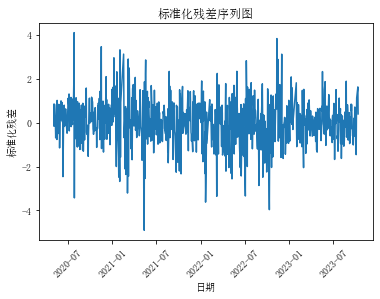

In [29]:
import math
stdresid=model.resid.iloc[1:]/math.sqrt(1.712244) #标准化残差
plt.rcParams['font.sans-serif'] = ['SimSun'] #字体为黑体
plt.rcParams['axes.unicode_minus'] = False #正常显示负号
plt.plot(stdresid) #标准化残差序列图
plt.xticks(rotation=45) #坐标角度旋转
plt.xlabel('日期') #横、纵坐标以及标题命名
plt.ylabel('标准化残差')
plt.title('标准化残差序列图',loc='center')

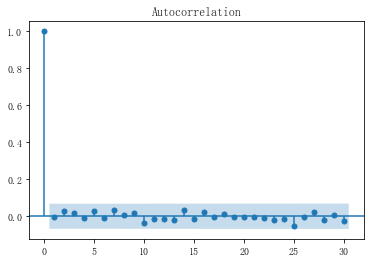

In [30]:
plot_acf(stdresid.iloc[1:],lags=30) 
plt.show()

In [31]:
from statsmodels.tsa import stattools #残差序列的白噪声检验
LjungBox=stattools.q_stat(stattools.acf(stdresid)[1:13],len(stdresid))
LjungBox[1][-1] #LjungBox检验的最后一个P值，大于0.05，通过白噪声检验

C:\Users\11065004\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\11065004\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


0.9673043370152311

In [32]:
a=model.forecast(2)
a

C:\Users\11065004\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


842    126.616231
843    126.627118
Name: predicted_mean, dtype: float64

In [33]:
ts.loc['2020-05-04':]

Date
2020-05-04     82.4
2020-05-05     83.5
2020-05-06     83.3
2020-05-07     83.5
2020-05-08     84.6
              ...  
2023-10-04    122.1
2023-10-05    122.4
2023-10-06    123.8
2023-10-11    125.9
2023-10-12    126.5
Name: Open, Length: 842, dtype: float64

In [34]:
from statsmodels.graphics.tsaplots import plot_predict

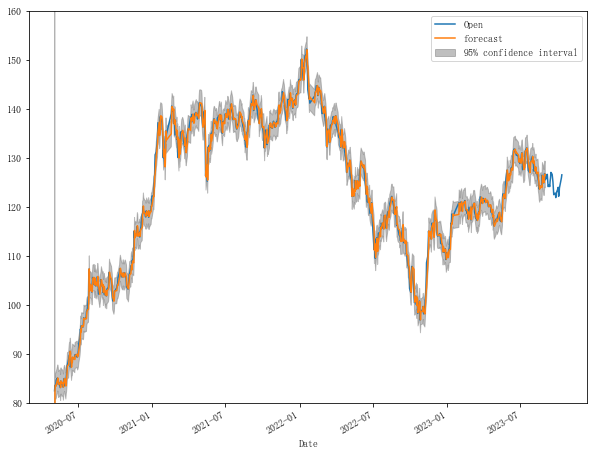

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = ts.loc['2020-05-04':].plot(ax=ax)
plot_predict(model,'2020-05', '2023-09', ax=ax)
plt.ylim(80,160)
plt.show()

In [36]:
#ARCH

In [37]:
resid1=result.resid #提取残差
LjungBox=stattools.q_stat(stattools.acf(resid1**2)[1:13],len(resid1)) #残差平方序列的白噪声检验
LjungBox[1][-1] #拒绝原假设，则残差序列具有ARCH效应

C:\Users\11065004\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\11065004\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


1.0

In [38]:
from arch import arch_model

In [39]:
# pip install arch

In [40]:
am=arch_model(resid1) #默认模型为GARCH（1，1）
model2=am.fit(update_freq=0) #估计参数

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1456.7818477400347
            Iterations: 12
            Function evaluations: 67
            Gradient evaluations: 12


In [41]:
print(model2.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1456.78
Distribution:                  Normal   AIC:                           2921.56
Method:            Maximum Likelihood   BIC:                           2940.51
                                        No. Observations:                  842
Date:                Thu, Oct 12 2023   Df Residuals:                      841
Time:                        18:54:33   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0288  4.394e-02      0.655      0.513 [-5.73